In [7]:
# Import Required Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

In [8]:
athletes_data = pd.read_csv("summerOly_athletes.csv", encoding="ISO-8859-1")
hosts_data = pd.read_csv("summerOly_hosts.csv", encoding="ISO-8859-1")
medal_counts_data = pd.read_csv("summerOly_medal_counts.csv", encoding="ISO-8859-1")
programs_data = pd.read_csv("summerOly_programs.csv", encoding="ISO-8859-1")

# Display the first 2 rows of each dataset
print("Athletes Data:\n", athletes_data.head(2))
print("\nHosts Data:\n", hosts_data.head(2))
print("\nMedal Counts Data:\n", medal_counts_data.head(2))
print("\nPrograms Data:\n", programs_data.head(2))

Athletes Data:
         Name Sex   Team  NOC  Year       City       Sport  \
0  A Dijiang   M  China  CHN  1992  Barcelona  Basketball   
1   A Lamusi   M  China  CHN  2012     London        Judo   

                          Event     Medal  
0   Basketball Men's Basketball  No medal  
1  Judo Men's Extra-Lightweight  No medal  

Hosts Data:
    ï»¿Year               Host
0     1896  Â Athens,Â Greece
1     1900   Â Paris,Â France

Medal Counts Data:
    Rank            NOC  Gold  Silver  Bronze  Total  Year
0     1  United States    11       7       2     20  1896
1     2         Greece    10      18      19     47  1896

Programs Data:
       Sport         Discipline Code Sports Governing Body 1896 1900 1904  \
0  Aquatics  Artistic Swimming  SWA        World Aquatics    0    0    0   
1  Aquatics             Diving  DIV        World Aquatics    0    0    2   

   1906*  1908 1912  ...  1988 1992 1996 2000 2004 2008  2012 2016  2020 2024  
0      0     0    0  ...     2    2  1.0  2

In [9]:
### CELL #3: Data Preparation
# Fix encoding issue: Rename 'ï»¿Year' to 'Year'
hosts_data.rename(columns={'ï»¿Year': 'Year'}, inplace=True)

# Ensure the 'Year' column in both datasets is clean and consistent
hosts_data['Year'] = hosts_data['Year'].astype(str).str.strip()
medal_counts_data['Year'] = medal_counts_data['Year'].astype(str).str.strip()

# Merge medal counts with hosts for host country analysis
#medal_counts_data = medal_counts_data.merge(hosts_data, on="Year", how="left")

# Clean medal counts data
medal_counts_data["NOC"] = medal_counts_data["NOC"].str.strip()
hosts_data["Host"] = hosts_data["Host"].str.strip()

# Merge hosts data with medal counts data
medal_with_hosts = pd.merge(medal_counts_data, hosts_data, on="Year", how="left")

# Add a column indicating whether the country is the host
medal_with_hosts["Host_Country"] = medal_with_hosts["Host"].apply(lambda x: 1 if x and x.split(",")[0] in medal_with_hosts["NOC"].values else 0)

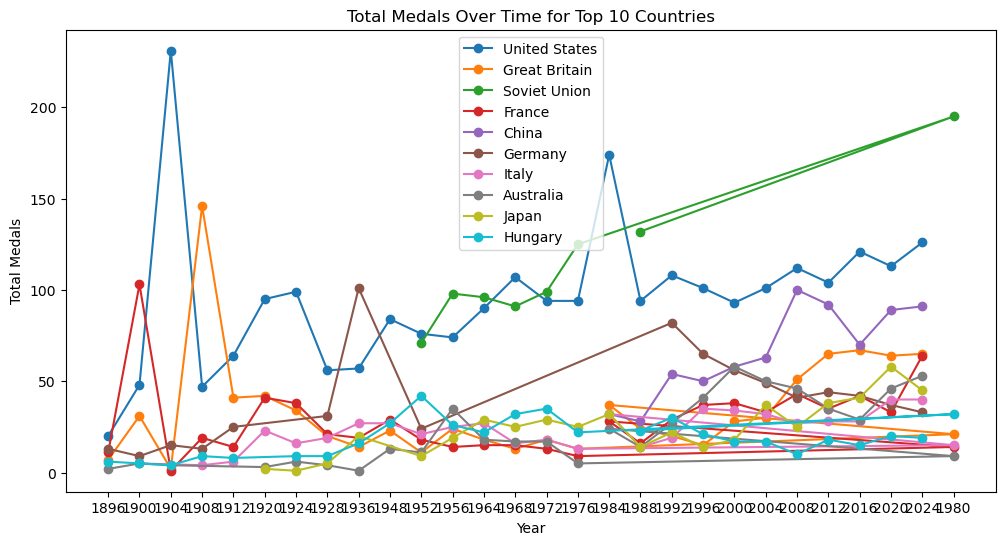

In [10]:
# Plot 1: Medal trends over time
plt.figure(figsize=(12, 6))
top_countries = medal_counts_data.groupby('NOC')['Total'].sum().nlargest(10).index
for country in top_countries:
    country_data = medal_counts_data[medal_counts_data['NOC'] == country]
    plt.plot(country_data['Year'], country_data['Total'], label=country, marker='o')

plt.xlabel('Year')
plt.ylabel('Total Medals')
plt.title('Total Medals Over Time for Top 10 Countries')
plt.legend()
plt.show()

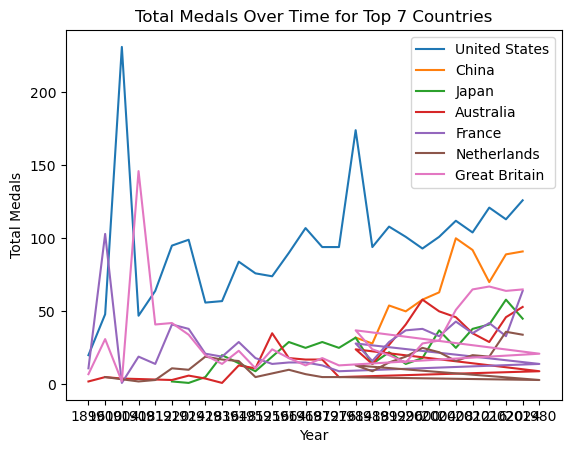

In [16]:
# Step 2: Exploratory Data Analysis (EDA)
def plot_medal_trends():
    """Plot the trends in total medals over time for the top 7 countries."""
    top_countries = ['United States', 'China', 'Japan', 'Australia', 'France', 'Netherlands', 'Great Britain']
    top_country_data = medal_counts_data[medal_counts_data['NOC'].isin(top_countries)]

    for country in top_countries:
        country_data = top_country_data[top_country_data['NOC'] == country]
        plt.plot(country_data['Year'], country_data['Total'], label=country)

    plt.xlabel('Year')
    plt.ylabel('Total Medals')
    plt.title('Total Medals Over Time for Top 7 Countries')
    plt.legend()
    plt.show()

plot_medal_trends()